In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [55]:
from tensorflow.keras.utils import plot_model
import pandas as pd

# Introduction to neural network classififcation

## Creating data to view and fit

In [81]:
from sklearn.datasets import make_circles

n_samples = 1_000

X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [82]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [83]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

#### Visualize

In [84]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'label': y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


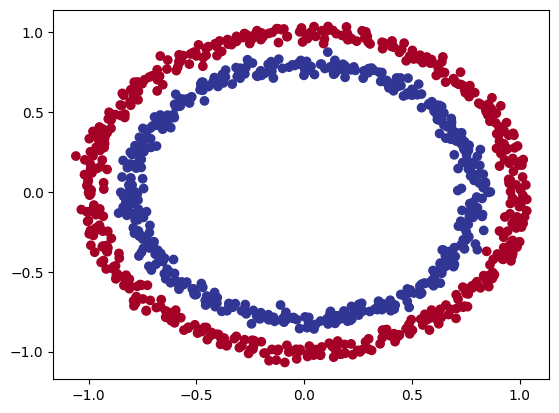

In [85]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Steps for modelling

In [86]:
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
model_1.fit(X, y, epochs=5)


# Evaluate the model

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 6.3561 - accuracy: 0.4850
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 6.3457 - accuracy: 0.4840
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 6.3319 - accuracy: 0.4850
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 6.3320 - accuracy: 0.4850
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 6.3315 - accuracy: 0.4850


In [87]:
model_1.fit(X, y, epochs=200, verbose=0)

In [88]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 947us/step - loss: 4.5790 - accuracy: 0.4700


[4.578975200653076, 0.4699999988079071]

## New Model

In [89]:
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
model_2.fit(X, y, epochs=50, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 4.4619 - accuracy: 0.4660


[4.461879253387451, 0.4659999907016754]

## Imporved Model

In [90]:
tf.random.set_seed(42)


# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history = model_3.fit(X, y, epochs=100, verbose=0)

In [91]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6993 - accuracy: 0.5130


[0.6992933750152588, 0.5130000114440918]

Text(0.5, 0, 'epochs')

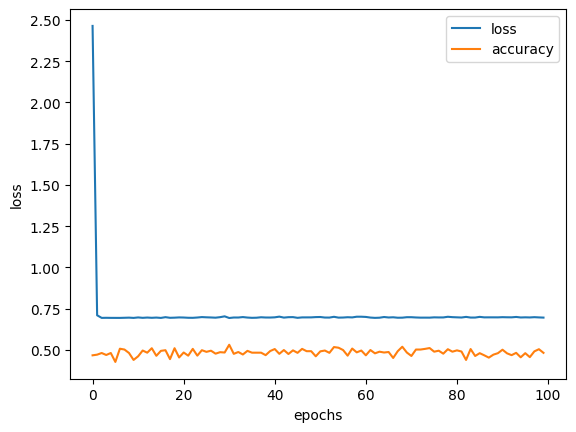

In [92]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [139]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X
    """
    # define the axis boundary of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_pred = model.predict(x_in)

    if len(y_pred[0]) > 1:
        print('doing multiclass classification')
        # reshape the predicitons to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, aplha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 845us/step
doing binary classification


/var/folders/0v/kh6l8w3s641dg_78bsfxrsrw0000gn/T/ipykernel_24574/678497717.py:22: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, aplha=0.7)


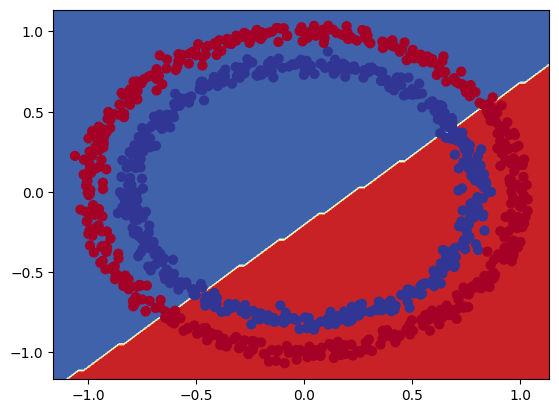

In [140]:
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

32/32 [==============================] - 0s 1ms/step


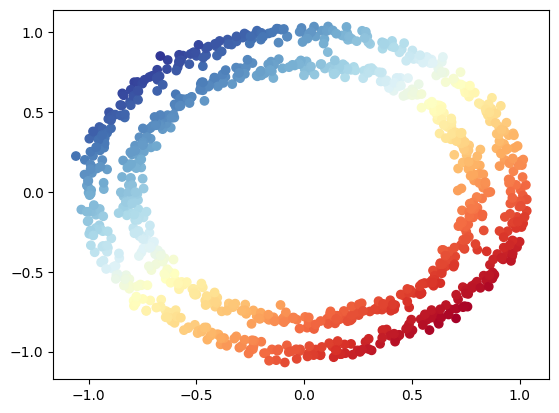

In [141]:
y_pred = model_3.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.RdYlBu)

## Best Model

In [193]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.7061 - accuracy: 0.5030
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5370
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6846 - accuracy: 0.5520
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6810 - accuracy: 0.5660
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6786 - accuracy: 0.5680
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6768 - accuracy: 0.5650
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.5620
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6739 - accuracy: 0.5590
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6726 - accuracy: 0.5700
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6715 - accuracy: 0.5720
Epoch 11/

Text(0.5, 0, 'epochs')

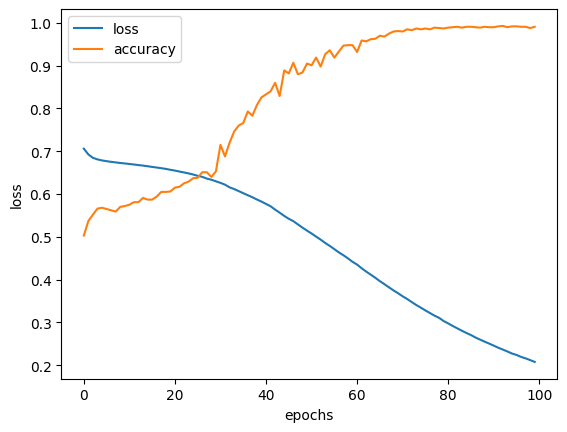

In [194]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

313/313 [==============================] - 0s 877us/step
doing binary classification


/var/folders/0v/kh6l8w3s641dg_78bsfxrsrw0000gn/T/ipykernel_24574/678497717.py:22: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, aplha=0.7)


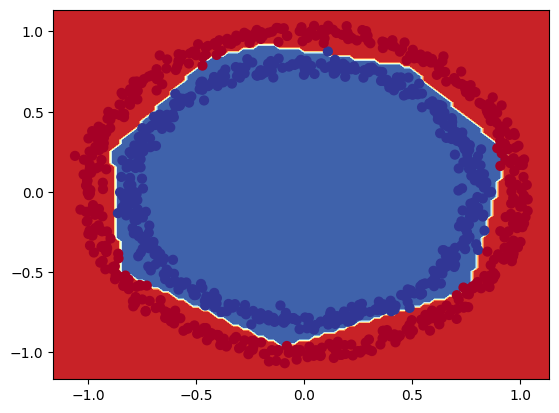

In [195]:
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y);

## Best Model

In [198]:
from sklearn.model_selection import train_test_split

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

Epoch 1/30
25/25 [==============================] - 1s 2ms/step - loss: 0.6881 - accuracy: 0.5500
Epoch 2/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5700
Epoch 3/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.5788
Epoch 4/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.5863
Epoch 5/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.5750
Epoch 6/30
25/25 [==============================] - 0s 1ms/step - loss: 0.6470 - accuracy: 0.6112
Epoch 7/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.6513
Epoch 8/30
25/25 [==============================] - 0s 1ms/step - loss: 0.5584 - accuracy: 0.8112
Epoch 9/30
25/25 [==============================] - 0s 1ms/step - loss: 0.5078 - accuracy: 0.8325
Epoch 10/30
25/25 [==============================] - 0s 1ms/step - loss: 0.4737 - accuracy: 0.8175
Epoch 11/30
25/25 [

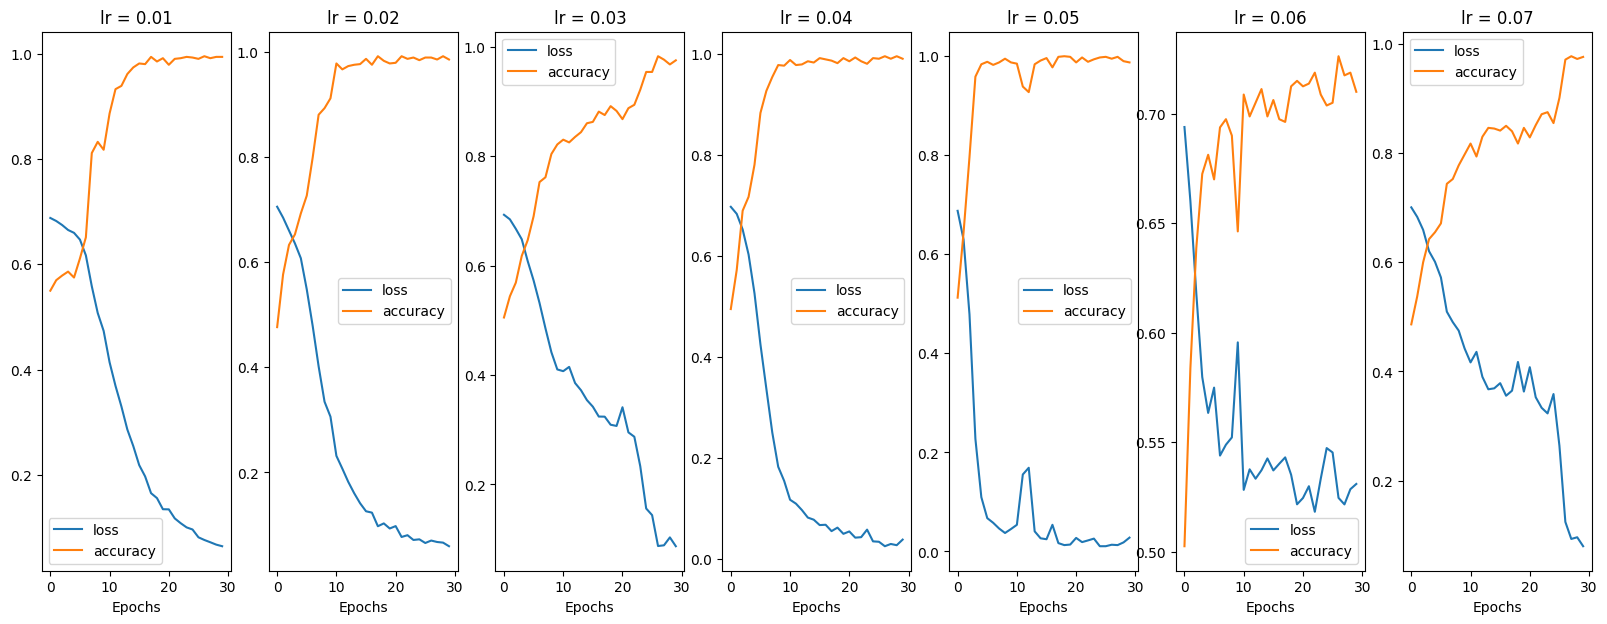

In [299]:
def best_model(lr):
    tf.random.set_seed(42)

    model_best = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model_best.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        metrics=['accuracy']
    )
    history = model_best.fit(X_train, y_train, epochs=30)
    return history

plt.figure(figsize=(20, 7))
for idx, lr in enumerate(range(1, 8)):
    pd.DataFrame(best_model(lr / 100).history).plot(ax=plt.subplot(1, 7, idx + 1))
    plt.xlabel('Epochs')
    plt.title(f'lr = {lr / 100}')

In [232]:
model_best.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0954 - accuracy: 0.9700


[0.09537956118583679, 0.9700000286102295]

313/313 [==============================] - 0s 841us/step
doing binary classification


/var/folders/0v/kh6l8w3s641dg_78bsfxrsrw0000gn/T/ipykernel_24574/678497717.py:22: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, aplha=0.7)


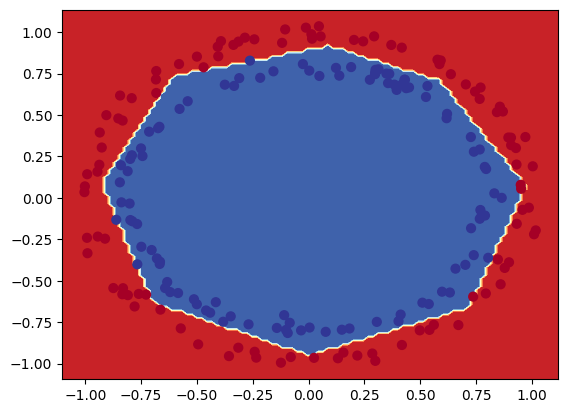

In [233]:
plot_decision_boundary(model=model_best,
                       X=X_test,
                       y=y_test)

Text(0.5, 0, 'epochs')

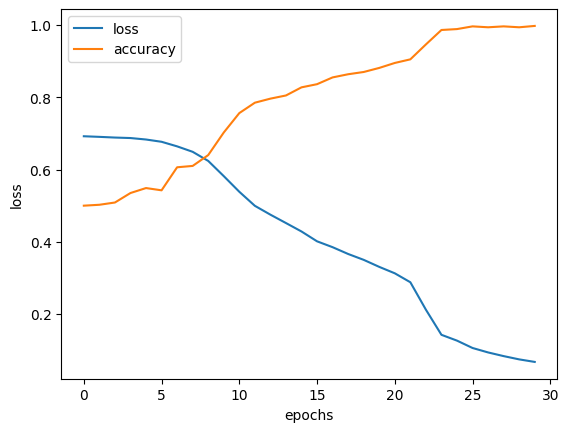

In [234]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

### Ideal Learning Rate

In [317]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=['accuracy']
)

# Create learning rate callback

#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))


#history = model_5.fit(X_train, y_train, epochs=20, callbacks=[lr_scheduler]);
history = model_5.fit(X_train, y_train, epochs=20);

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6877 - accuracy: 0.5275
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.5700
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.6662
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5962 - accuracy: 0.6762
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5716 - accuracy: 0.7262
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5198 - accuracy: 0.7600
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4705 - accuracy: 0.8175
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.8188
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4150 - accuracy: 0.8138
Epoch 11/20
25/25 [

In [318]:
model_5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.2067 - accuracy: 0.9250


[0.20674830675125122, 0.925000011920929]

<AxesSubplot: >

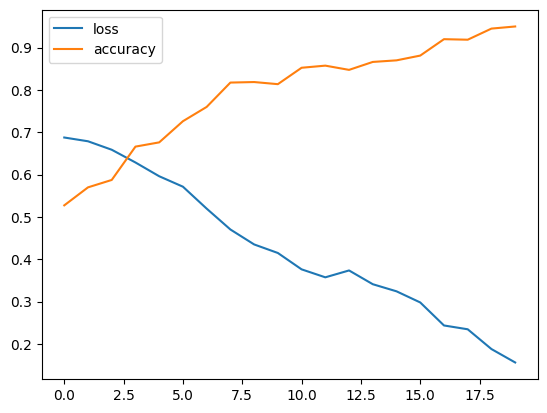

In [319]:
pd.DataFrame(history.history).plot()

In [321]:
# lrs = 1e-4 * (10 ** (tf.range(100) / 20))
# plt.figure(figsize=(10, 6))
# plt.semilogx(lrs, history.history['loss'])
# plt.xlabel('Learning Rate')
# plt.ylabel('Losses')
# plt.title('Learning rate vs. Losses')

## Another Metrics

In [322]:
loss, accuracy = model_5.evaluate(X_test, y_test)
print(f'Model loss on the last test set: {loss}')
print(f'Model accuracy on test set: {(accuracy * 100):.2f} %')

7/7 [==============================] - 0s 1ms/step - loss: 0.2067 - accuracy: 0.9250
Model loss on the last test set: 0.20674830675125122
Model accuracy on test set: 92.50 %


## Confusion Matrix

In [323]:
from sklearn.metrics import confusion_matrix

y_preds = tf.round(np.squeeze(model_5.predict(X_test)))

confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 1ms/step


array([[99,  1],
       [14, 86]])

In [313]:
y_test[:10], y_preds[:10]

(array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0]),
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>)

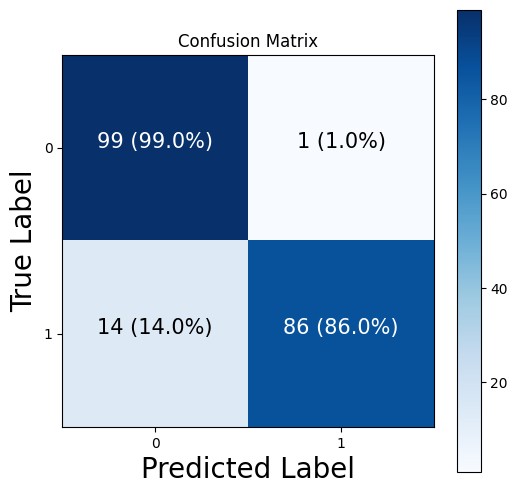

In [361]:
import itertools

figsize=(6, 6)

cm = confusion_matrix(y_test, y_preds)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]


fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

ax.set(title='Confusion Matrix',
       xlabel='Predicted Label',
       ylabel='True Label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels
       );

# Set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)

threshold = (cm.max() + cm.min()) / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)',
             horizontalalignment='center',
             color='white' if cm[i, j] > threshold else 'black',
             size=15)

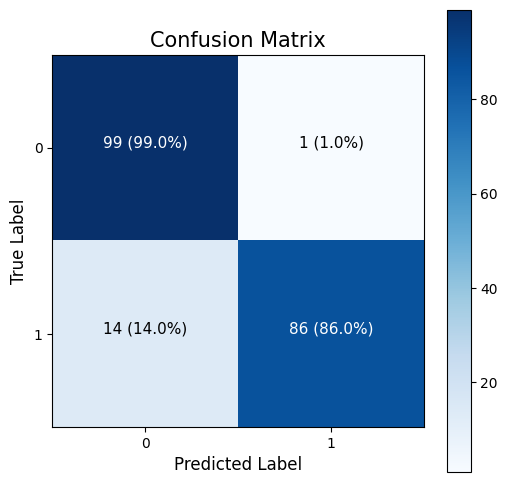

In [366]:
import itertools

figsize=(6, 6)

cm = confusion_matrix(y_test, y_preds)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]


fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

ax.set(title='Confusion Matrix',
       xlabel='Predicted Label',
       ylabel='True Label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels
       );

# Set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_size(12)
ax.title.set_size(15)

threshold = (cm.max() + cm.min()) / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)',
             horizontalalignment='center',
             color='white' if cm[i, j] > threshold else 'black',
             size=11)

In [351]:
list(range(cm.shape[1]))

[0, 1]

# Multiclass Classification

In [368]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

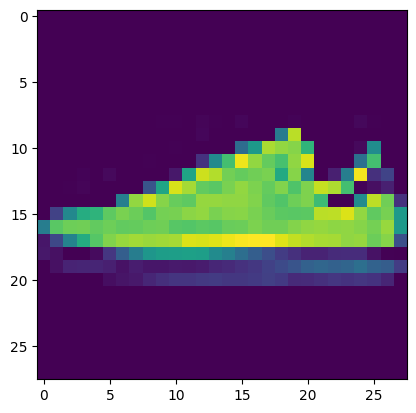

In [379]:
plt.imshow(train_data[6]);

In [381]:
class_names = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

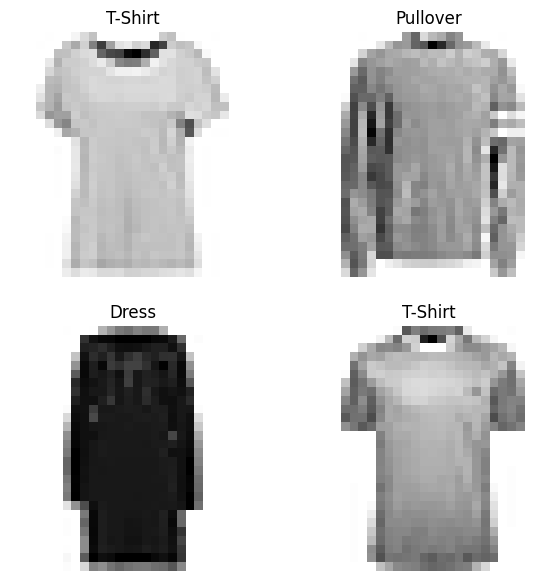

In [387]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building Multi-class Classification Model

In [402]:
tf.random.set_seed(42)

model_multi_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# labels are expected to be one-hoted otherwise use SparseCategoricalCrossentropy 
# tf.one_hot(train_labels, depth=10)
model_multi_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

non_norm_history = model_multi_1.fit(
    train_data,
    train_labels,
    epochs=10,
    validation_data=(test_data, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2808 - accuracy: 0.1742 - val_loss: 2.0624 - val_accuracy: 0.1877
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.0607 - accuracy: 0.1854 - val_loss: 2.1025 - val_accuracy: 0.1718
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.0471 - accuracy: 0.1895 - val_loss: 2.0491 - val_accuracy: 0.1926
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.0318 - accuracy: 0.1905 - val_loss: 2.0300 - val_accuracy: 0.1918
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.8487 - accuracy: 0.2499 - val_loss: 1.6189 - val_accuracy: 0.3487
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5406 - accuracy: 0.3288 - val_loss: 1.5222 - val_accuracy: 0.3235
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4759 - accuracy: 0.3505 - val_loss: 1.4542 - val_accuracy:

In [396]:
model_multi_1.summary()

Model: "sequential_131"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_365 (Dense)           (None, 4)                 3140      
                                                                 
 dense_366 (Dense)           (None, 4)                 20        
                                                                 
 dense_367 (Dense)           (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [397]:
train_data.min(), train_data.max()

(0, 255)

In [398]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [399]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [401]:
tf.random.set_seed(42)

model_multi_1_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# labels are expected to be one-hoted otherwise use SparseCategoricalCrossentropy 
# tf.one_hot(train_labels, depth=10)
model_multi_1_norm.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

norm_history = model_multi_1_norm.fit(
    train_data_norm,
    train_labels,
    epochs=10,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2677 - accuracy: 0.4557 - val_loss: 0.9790 - val_accuracy: 0.5947
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8852 - accuracy: 0.6319 - val_loss: 0.8370 - val_accuracy: 0.6677
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7852 - accuracy: 0.6909 - val_loss: 0.7528 - val_accuracy: 0.7324
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6702 - accuracy: 0.7651 - val_loss: 0.6524 - val_accuracy: 0.7780
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6149 - accuracy: 0.7829 - val_loss: 0.6181 - val_accuracy: 0.7870
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5878 - accuracy: 0.7920 - val_loss: 0.6009 - val_accuracy: 0.7910
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5717 - accuracy: 0.7959 - val_loss: 0.5975 - val_accuracy:

<AxesSubplot: >

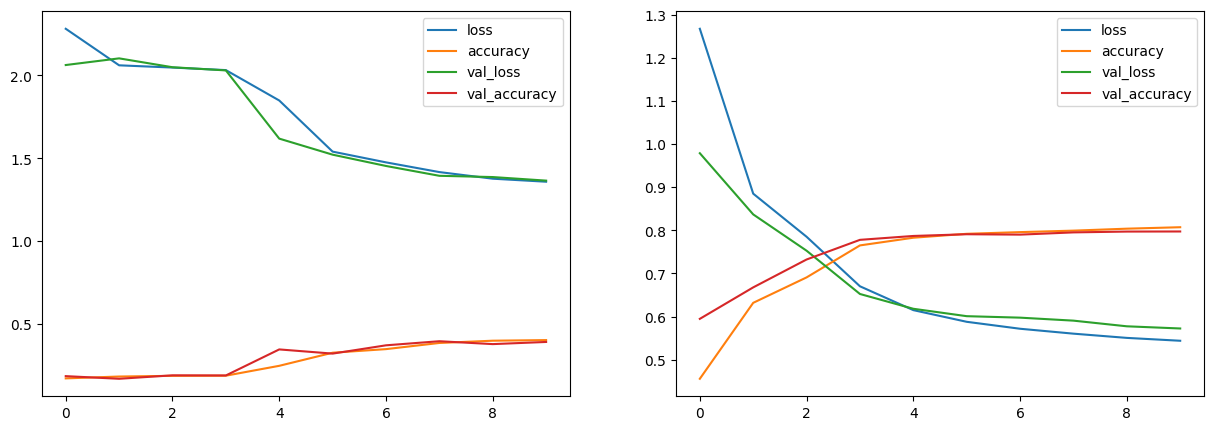

In [410]:
plt.figure(figsize=(15, 5))
pd.DataFrame(non_norm_history.history).plot(ax=plt.subplot(1, 2, 1))
pd.DataFrame(norm_history.history).plot(ax=plt.subplot(1, 2, 2))


## Finding the ideal Learning Rate

In [436]:
tf.random.set_seed(42)

model_multi_2_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# labels are expected to be one-hoted otherwise use SparseCategoricalCrossentropy 
# tf.one_hot(train_labels, depth=10)
model_multi_2_norm.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

find_lr_history = model_multi_2_norm.fit(
    train_data_norm,
    train_labels,
    epochs=15,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_scheduler]
)

Epoch 1/15
1875/1875 [==============================] - 4s 1ms/step - loss: 1.2864 - accuracy: 0.5228 - val_loss: 0.9095 - val_accuracy: 0.6200 - lr: 0.0010
Epoch 2/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7938 - accuracy: 0.6776 - val_loss: 0.7538 - val_accuracy: 0.6823 - lr: 0.0011
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6901 - accuracy: 0.7324 - val_loss: 0.6820 - val_accuracy: 0.7496 - lr: 0.0013
Epoch 4/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6277 - accuracy: 0.7781 - val_loss: 0.6286 - val_accuracy: 0.7854 - lr: 0.0014
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5985 - accuracy: 0.7883 - val_loss: 0.6205 - val_accuracy: 0.7791 - lr: 0.0016
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5771 - accuracy: 0.7985 - val_loss: 0.6070 - val_accuracy: 0.7823 - lr: 0.0018
Epoch 7/15
1875/1875 [==============================] - 2s

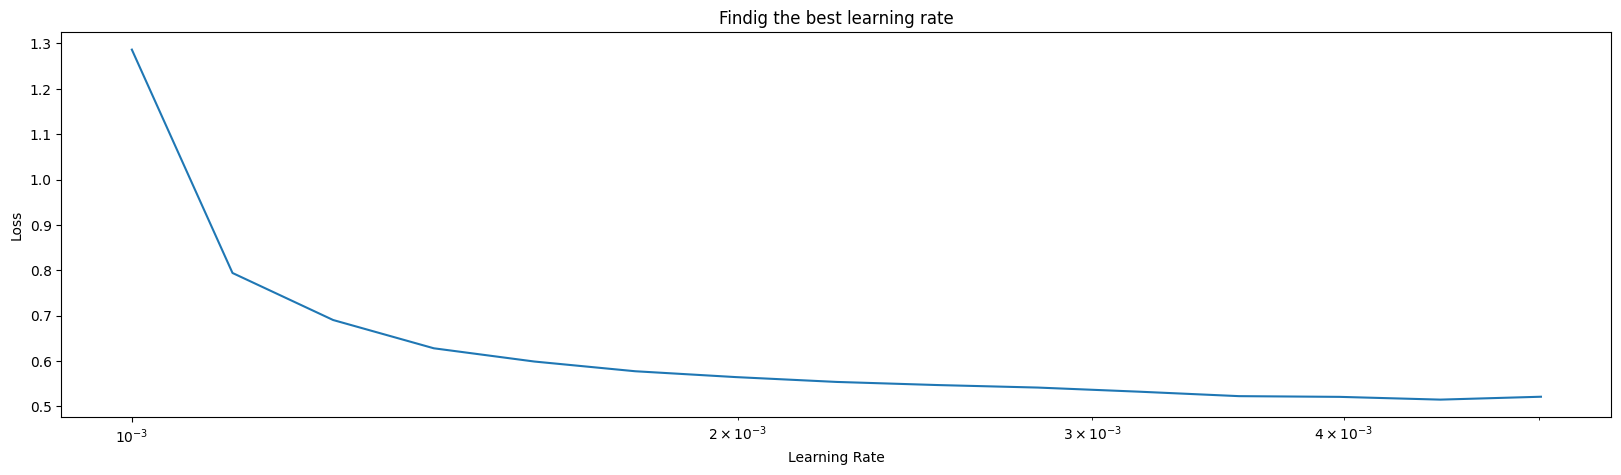

In [437]:
#pd.DataFrame(find_lr_history.history).plot();
plt.figure(figsize=(20, 5))
y = find_lr_history.history['loss']
x = find_lr_history.history['lr']
plt.semilogx(x, y)
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Findig the best learning rate');

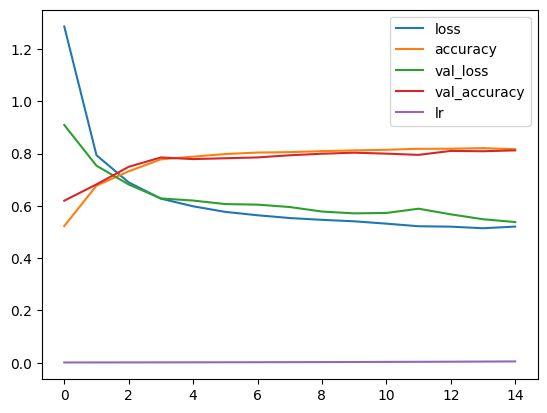

In [438]:
pd.DataFrame(find_lr_history.history).plot();

## Evaluating our multi-class classification model

In [459]:
import itertools
from sklearn.metrics import confusion_matrix


def confusion_matrix_func(y_true, y_pred, classes=None, figsize=(20, 15)):

    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]


    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
        );

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)

    threshold = (cm.max() + cm.min()) / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)',
                horizontalalignment='center',
                color='white' if cm[i, j] > threshold else 'black',
                size=10)

In [449]:
class_names

['T-Shirt',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [450]:
y_probs = model_multi_2_norm.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[1.8788525e-06, 6.3513075e-06, 2.0500080e-07, 1.6624683e-05,
        1.4577911e-07, 2.0428792e-01, 5.2618918e-07, 2.1757703e-01,
        2.5980677e-05, 5.7808340e-01],
       [1.4660567e-02, 1.4281226e-03, 8.1199658e-01, 1.5472644e-03,
        4.8679341e-02, 2.4041918e-21, 1.2168739e-01, 4.7760778e-27,
        7.1145212e-07, 2.2084722e-31],
       [2.2087406e-08, 9.9982023e-01, 9.1064532e-05, 3.3689765e-05,
        5.4990713e-05, 9.5779901e-22, 5.7556740e-08, 6.7442064e-14,
        9.3413298e-12, 1.1549299e-28],
       [4.0695727e-09, 9.9986362e-01, 3.6916445e-06, 1.1440731e-04,
        1.8200361e-05, 9.2192628e-23, 4.4864881e-09, 5.8320222e-15,
        1.2508294e-12, 9.0250234e-31],
       [2.9643652e-01, 4.0218519e-04, 5.2281566e-02, 1.3393936e-01,
        4.9810298e-02, 3.8206962e-11, 4.6306381e-01, 1.5176182e-19,
        4.0663020e-03, 7.1281992e-20]], dtype=float32)

In [451]:
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

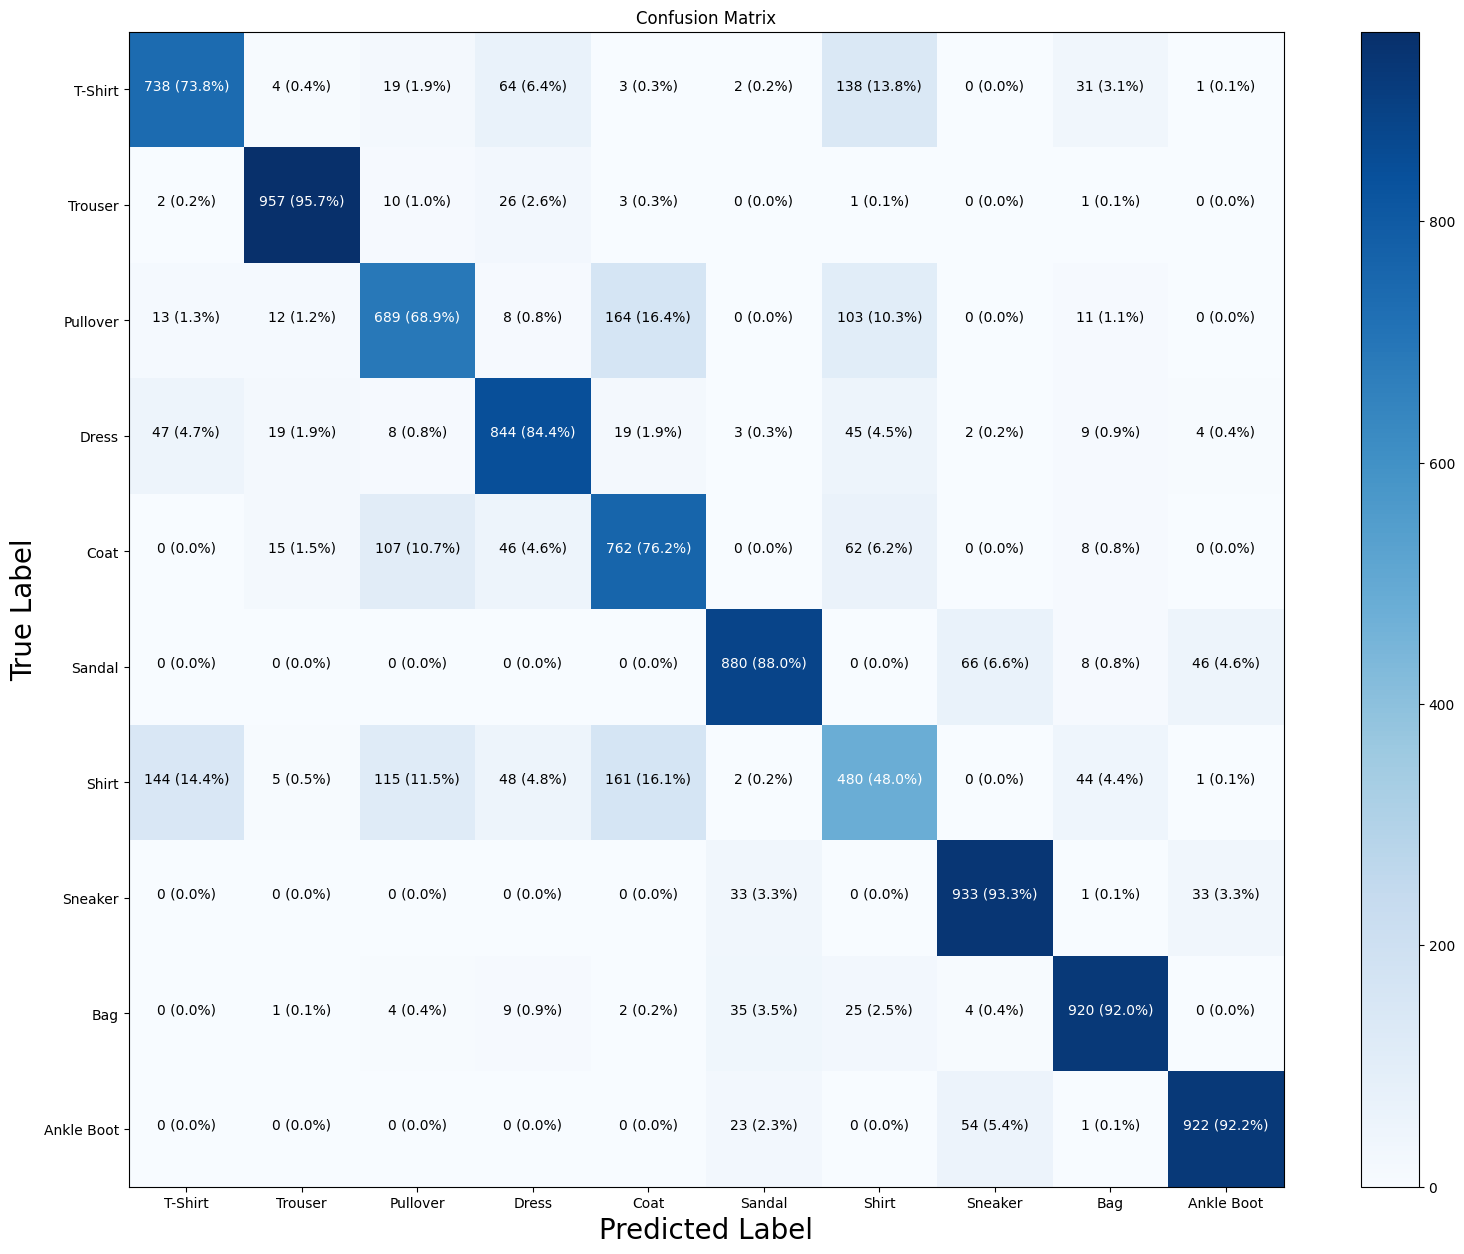

In [461]:
confusion_matrix_func(test_labels, y_preds, class_names)

In [537]:
import random
def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels with a prediction and truth label.
    """
    i = random.randint(0, len(images))

    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    plt.imshow(target_image, cmap=plt.cm.binary)

    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel(f'Pred: {pred_label} ({100 * tf.reduce_max(pred_probs):.03f}%) \n(True: {true_label})', color=color)

1/1 [==============================] - 0s 48ms/step
(1, 10)


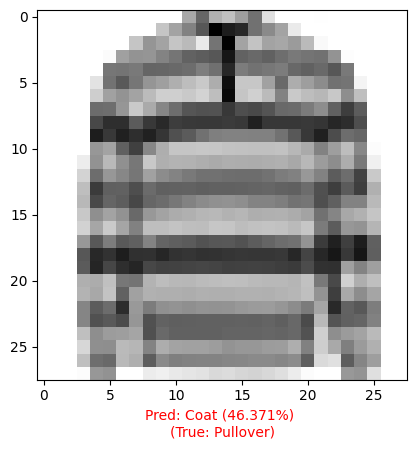

In [550]:
plot_random_image(model=model_multi_2_norm,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns our model is learning?

In [552]:
model_multi_2_norm.layers

In [553]:
model_multi_2_norm.layers[1]

In [557]:
weights, biases = model_multi_2_norm.layers[1].get_weights()
weights, weights.shape

(array([[ 0.88074625, -0.13308956, -1.2349215 ,  0.9887061 ],
        [ 0.6249028 ,  0.7287514 , -1.875992  ,  0.5075257 ],
        [ 1.2666633 , -0.0058355 , -1.3599771 , -1.2140261 ],
        ...,
        [-0.0675194 ,  0.10466748, -0.08807839,  0.68220806],
        [-0.38197094,  0.20341098, -0.42253074,  0.38631067],
        [ 0.4881708 ,  0.02482912, -0.560234  ,  0.34313026]],
       dtype=float32),
 (784, 4))